<a href="https://colab.research.google.com/github/Noobs-in-Devhack/AI---ML-/blob/main/7%20-%20Decision_Tree_%26_Random_Forest_Churn_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Step 1. Import Libraries and Read DataSets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
churn_data = pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/churn-bigml-80.csv")
churn_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Step 2. Data Manipulation
    * Is there any missing values ?

In [ ]:
churn_data.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

#### Step 3. Data Pre-Processing
    * Handling Categorical dataset,

In [ ]:
# Categorical values must be converted to numerical values using label encoder, one-hot encoding
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()

In [ ]:
le_encoder.fit(churn_data['International plan'])

LabelEncoder()

In [ ]:
churn_data['International plan'] = le_encoder.transform(churn_data['International plan'])

In [ ]:
le_encoder.fit(churn_data['Voice mail plan'])
churn_data['Voice mail plan'] = le_encoder.transform(churn_data['Voice mail plan'])

In [ ]:
churn_data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,0,0,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


#### Is there any Multicollinearity ?

In [ ]:
churn_df = churn_data.drop('State', axis = 1)

<Axes: >

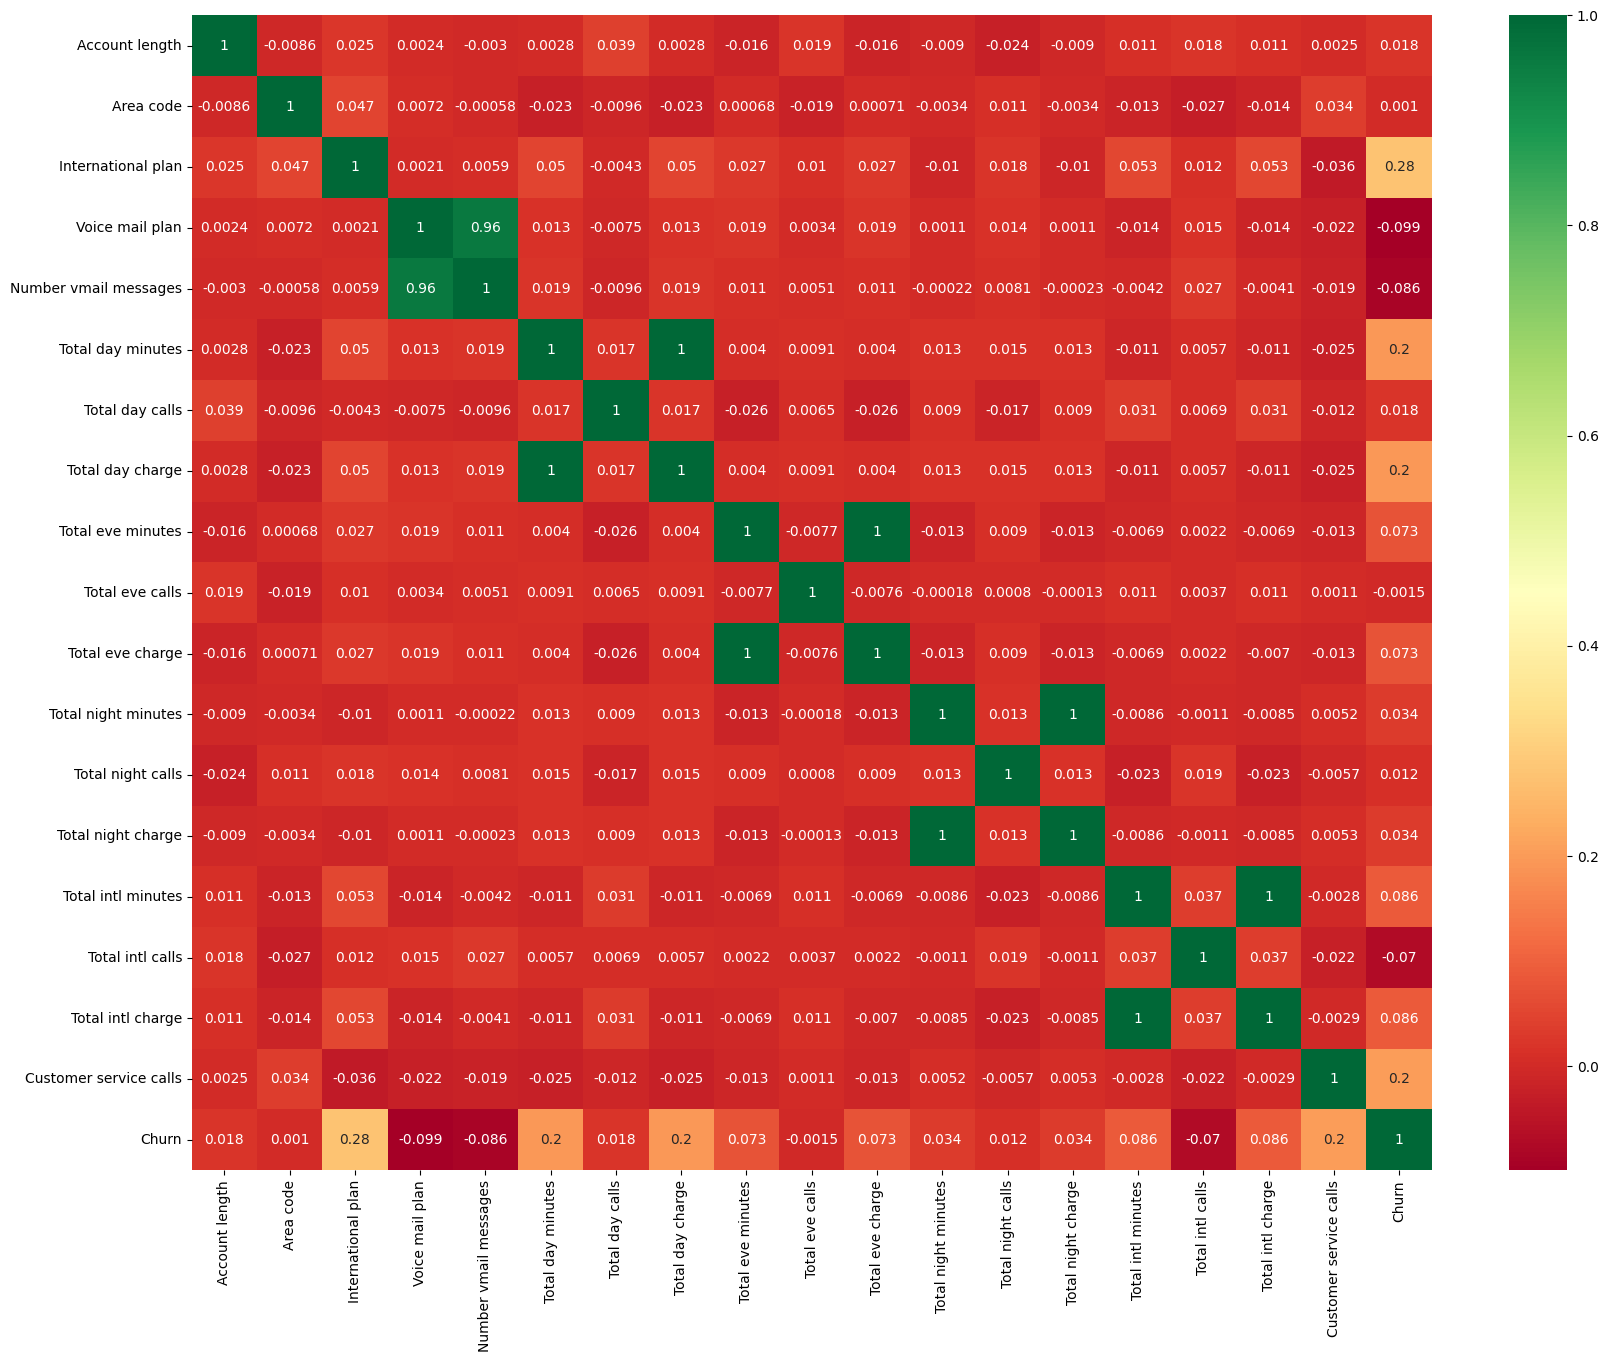

In [ ]:
plt.figure(figsize = (20,15))
sns.heatmap(churn_df.corr(), annot = True, cmap = 'RdYlGn')

#### Imabalaced Class Data

In [ ]:
churn_df['Churn'].value_counts()

Churn
False    2278
True      388
Name: count, dtype: int64

##### Remove Multicollinearity

In [ ]:
churn_df.columns

Index(['Account length', 'Area code', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn'],
      dtype='object')

##### Split into Features & Labels

In [ ]:
X = churn_df.drop(['Number vmail messages','Total day charge','Total eve charge','Total night charge','Total intl charge', 'Churn'], axis = 1)
Y = churn_df['Churn']

##### Handling Imbalaced Class - SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
transformed_feature, transformed_label = oversample.fit_resample(X, Y)

#### Train & Test Split

In [ ]:
transformed_label.value_counts()

Churn
False    2278
True     2278
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(transformed_feature, transformed_label, test_size = 0.2, random_state = 3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# criterion = gini or entropy, max_depth = 11
clf_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 11)

In [ ]:
clf_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [ ]:
clf_tree.score(x_train, y_train)

0.9099890230515917

In [ ]:
clf_tree.score(x_test, y_test)

0.8421052631578947

In [ ]:
clf_tree.get_depth()

11

#### Plot a Decision Tree

In [ ]:
import graphviz
from sklearn import tree

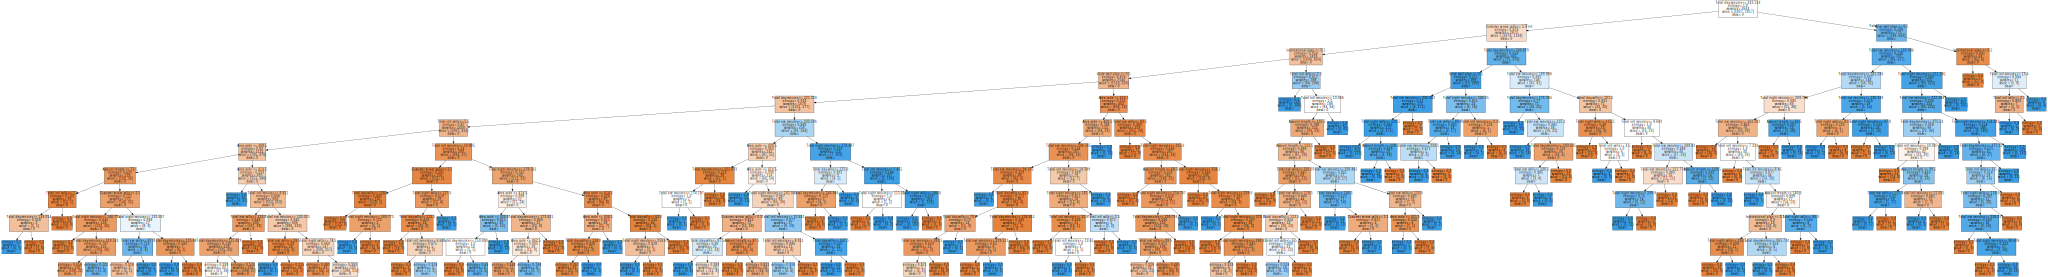

In [ ]:
dot_data = tree.export_graphviz(clf_tree, feature_names = X.columns, class_names = str(Y), filled = True)
graph = graphviz.Source(dot_data, format = 'png')
graph

#### Classification Metrics

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
predict = clf_tree.predict(x_test)

In [ ]:
confusion_matrix(y_test, predict)

array([[416,  35],
       [109, 352]])

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

       False       0.79      0.92      0.85       451
        True       0.91      0.76      0.83       461

    accuracy                           0.84       912
   macro avg       0.85      0.84      0.84       912
weighted avg       0.85      0.84      0.84       912



##### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# criterion = 'entropy' or 'gini', max_depth = decision tree maximum depth, max_features = num of features from sample data, n_estimators = num of decision tree
clf_rf = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', max_depth = 11, max_features = 5)

In [ ]:
clf_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, max_features=5,
                       n_estimators=50)

In [ ]:
clf_rf.score(x_test, y_test)    # Accuracy of Random Forest Model

0.8980263157894737

#### Classification Metrics

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
predict = clf_rf.predict(x_test)

In [ ]:
confusion_matrix(y_test, predict)

array([[431,  20],
       [ 73, 388]])

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

       False       0.86      0.96      0.90       451
        True       0.95      0.84      0.89       461

    accuracy                           0.90       912
   macro avg       0.90      0.90      0.90       912
weighted avg       0.90      0.90      0.90       912



In [ ]:
clf_rf = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators' : np.arange(25,100), 'max_depth': np.arange(5,13), 'max_features' : np.arange(3,11)}
rf_cv = GridSearchCV(clf_rf, param_grid, cv = 7)

In [ ]:
rf_cv.fit(x_train, y_train)

KeyboardInterrupt: 